In [1]:
# import imagej
import numpy as np
from skimage import io
import cv2

In [2]:
ij = imagej.init('sc.fiji:fiji', mode='headless')

Dec 08, 2023 2:21:52 AM java.util.prefs.FileSystemPreferences$1 run
INFO: Created user preferences directory.


In [3]:
image_path = '../../static_volume/0.png'
image_np = io.imread(image_path)

/opt/pysetup/.venv/lib/python3.11/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (113203894 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/pysetup/.venv/lib/python3.11/site-packages/imageio/plugins/pillow.py:304: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


In [13]:
# Convert the numpy array to an ImageJ2 dataset
dataset = ij.io().open('../../static_volume/0.png')

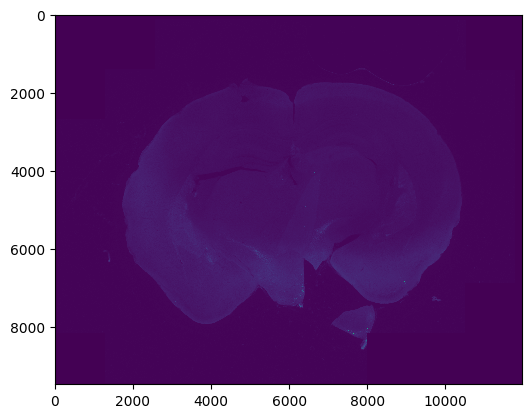

In [16]:
ij.py.show(dataset)

In [ ]:
# Convert the ImageJ2 dataset back to a numpy array
image_np_adjusted = ij.py.from_java(image_ij)

In [ ]:
# Display or save the adjusted image
# Replace this with your preferred method of displaying or saving images
io.imshow(image_np_adjusted)
io.show()

In [2]:
def load_image(image_path):
    """ Load a 16-bit image from a file path. """
    return cv2.imread(image_path, cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)

def calculate_histogram_medium(image):
    """ Calculate the medium value of the image histogram for a 16-bit image. """
    # Adjust the bins and range for 16-bit
    histogram = cv2.calcHist([image], [0], None, [65536], [0,65536])
    medium = np.median(histogram)
    return medium

def adjust_brightness_contrast(image, brightness=0, contrast=0):
    """ Adjust the brightness and contrast of the image. For 16-bit, the scale is different. """
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 65535
        else:
            shadow = 0
            highlight = 65535 + brightness
        alpha_b = (highlight - shadow) / 65535
        gamma_b = shadow

        buf = cv2.addWeighted(image, alpha_b, image, 0, gamma_b)
    else:
        buf = image.copy()

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

# Example usage
image_path = "../../static_volume/0.png"
image = load_image(image_path)
medium = calculate_histogram_medium(image)
adjusted_image = adjust_brightness_contrast(image, brightness=medium, contrast=medium)

# Save or display the adjusted image
cv2.imwrite("adjusted_image.tif", adjusted_image)


True